In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import SGD

Load dữ liệu từ MNIST dataset, bao gồm 60.000 training set và 10.000 test set. Sau đó chia bộ traning set thành 2: 50.000 cho training set và 10.000 dữ liệu cho validation set.

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
print(X_val.shape)

11493376/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N * 28 * 28 * 1 để giống kích thước mà keras yêu cầu.

In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)

(50000, 28, 28, 1)


Bước này chuyển đổi one-hot encoding label Y của ảnh ví dụ số 5 thành vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Bước này định nghĩa model:
1. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2.  Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)
3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))
4. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))
5. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.
6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))


In [ ]:
# BatchNormalization()
# Init Weight ()
# k: số kernel 
# s: size_kernel
def build_model(k,s):
# 5. Định nghĩa model
  model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
  model.add(Conv2D(k, (s, s), padding='same', activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
  model.add(Conv2D(k, (s, s), activation='relu'))

# Thêm Max pooling layer
  model.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
  model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
  model.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
  model.add(Dense(10, activation='softmax'))

  return model

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model = build_model(32,3)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1321 - accuracy: 0.9593 - val_loss: 0.0528 - val_accuracy: 0.9841
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0489 - val_accuracy: 0.9856
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0444 - val_accuracy: 0.9883
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0467 - val_accuracy: 0.9892
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0555 - val_accuracy: 0.9882
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0541 - val_accuracy:

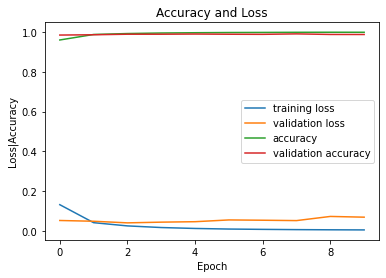

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.06135246530175209, 0.9869999885559082]


Ta sẽ dùng kết quả đánh giá của mode với test set để làm kết quả cuối cùng của model. Tức model của chúng ta dữ đoán chữ số có độ chính xác 98.92% với MNIST dataset. Nghĩa là dự đoán khoảng 100 ảnh thì sai 1 ảnh.

Giá trị dự đoán:  7


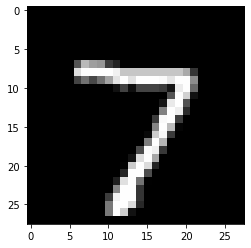

In [ ]:
# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

##11. So sánh các kết quả khi thay đổi lr, optimizer,kernel size, số kernel

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5533 - accuracy: 0.5966 - val_loss: 0.4858 - val_accuracy: 0.8740
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4012 - accuracy: 0.8867 - val_loss: 0.3061 - val_accuracy: 0.9141
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.9078 - val_loss: 0.2673 - val_accuracy: 0.9222
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2773 - accuracy: 0.9183 - val_loss: 0.2436 - val_accuracy: 0.9301
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9265 - val_loss: 0.2209 - val_accuracy: 0.9345
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2274 - accuracy: 0.9328 - val_loss: 0.2022 - val_accuracy: 0.9410
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2091 - accuracy: 0.9375 - val_loss: 0.1910 - val_accuracy:

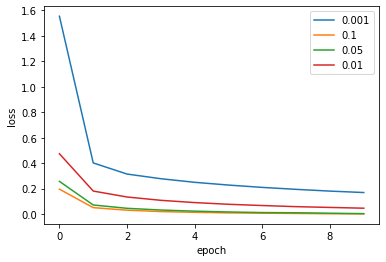

In [ ]:
learning_rates = [0.001,0.1,0.05,0.01]
for i, l_r in enumerate(learning_rates):
    model = build_model(32,3)
    model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate= l_r), 
              metrics=['accuracy'])
    
    H = model.fit(X_train, Y_train, 
                  validation_data=(X_val, Y_val),
                  batch_size=32, 
                  epochs=10, verbose=1)
    
    plt.plot(H.history['loss'], label = str(l_r))

plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
# số kernel 32, size 5*5
model2 = build_model(32,5)
model2.compile(loss='categorical_crossentropy',
              optimizer= 'adam'  , 
              metrics=['accuracy'])
    
H2 = model2.fit(X_train, Y_train, 
                validation_data=(X_val, Y_val),
                batch_size=32, 
                epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1175 - accuracy: 0.9635 - val_loss: 0.0502 - val_accuracy: 0.9862
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0374 - val_accuracy: 0.9896
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0520 - val_accuracy: 0.9868
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0493 - val_accuracy: 0.9862
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0663 - val_accuracy: 0.9849
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0503 - val_accuracy: 0.9887
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0463 - val_accuracy:

In [ ]:
# số kernel: 16, size: 3*3
model3 = build_model(16,3)
model3.compile(loss='categorical_crossentropy',
              optimizer= 'adam'  , 
              metrics=['accuracy'])
    
H3 = model3.fit(X_train, Y_train, 
                validation_data=(X_val, Y_val),
                batch_size=32, 
                epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1662 - accuracy: 0.9505 - val_loss: 0.0575 - val_accuracy: 0.9824
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9857 - val_loss: 0.0439 - val_accuracy: 0.9860
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0466 - val_accuracy: 0.9870
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0462 - val_accuracy: 0.9869
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0575 - val_accuracy: 0.9866
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0462 - val_accuracy: 0.9887
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0459 - val_accuracy:

In [ ]:
# số kernel: 64 , size 3*3
model4 = build_model(64,3)
model4.compile(loss='categorical_crossentropy',
              optimizer= 'adam'  , 
              metrics=['accuracy'])
    
H4 = model4.fit(X_train, Y_train, 
                validation_data=(X_val, Y_val),
                batch_size=32, 
                epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1150 - accuracy: 0.9638 - val_loss: 0.0510 - val_accuracy: 0.9840
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0446 - val_accuracy: 0.9880
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0393 - val_accuracy: 0.9884
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0474 - val_accuracy: 0.9899
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0641 - val_accuracy: 0.9868
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0540 - val_accuracy:

In [ ]:
# số kernel 32, size 4*4
model5 = build_model(32,4)
model5.compile(loss='categorical_crossentropy',
              optimizer= 'adam'  , 
              metrics=['accuracy'])
    
H5 = model5.fit(X_train, Y_train, 
                validation_data=(X_val, Y_val),
                batch_size=32, 
                epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1266 - accuracy: 0.9612 - val_loss: 0.0473 - val_accuracy: 0.9868
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0419 - val_accuracy: 0.9885
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0462 - val_accuracy: 0.9882
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0589 - val_accuracy: 0.9873
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0426 - val_accuracy:

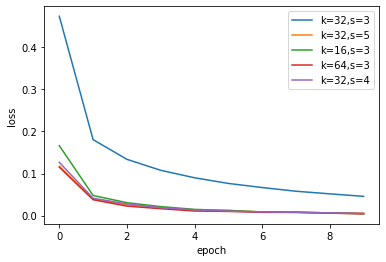

In [ ]:
plt.plot(H.history['loss'], label = 'k=32,s=3')
plt.plot(H2.history['loss'], label = 'k=32,s=5')
plt.plot(H3.history['loss'], label = 'k=16,s=3')
plt.plot(H4.history['loss'], label = 'k=64,s=3')
plt.plot(H5.history['loss'], label = 'k=32,s=4')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()